# Notebook for 8/30/2021 seminar on Haliburton pmag pole 

The current goal of this notebook is to show the Laurentia paleomagnetic pole compilation in the Mesoproterozoic to Neoproterozoic from the older Logan Loop to the Keweenawan Track and to the younger Grenville Loop. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib
import matplotlib.colors as colors
from scipy.constants import Julian_year
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
Laurentia_outline = ShapelyFeature(Reader('../data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## the Laurentia APWP

In [3]:
poles = pd.read_csv('../data/Laurentia_poles/Laurentia_poles.csv')
poles = poles[8:]
poles

,Unnamed: 0,PoleName,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,PmagRef,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,color
8,Mackenzie,Mackenzie dykes grand mean,65.00,250.00,4.0,190.0,5.000000,NaN,5.0,NaN,"Buchan et al., 2000",1267.00,1265.00,1269.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Sudbury,Sudbury Dykes Combined,46.30,278.60,-2.5,192.8,2.500000,NaN,52.0,NaN,"Palmer,H.C., Merz,B.A., Hayatsu,A., 1977",1237.00,1232.00,1242.00,NaN,NaN,NaN,NaN,NaN,NaN
10,Lamp_dikes,Lamprophyre dikes,48.80,273.30,58.0,223.3,9.200000,37.8,19.0,multiple polarity,"Piispa et al., 2018",1144.00,1130.00,1155.00,U-Pb perovskite and Ar-Ar phlogopite dates,Queen et al. (1996),NaN,NaN,NaN,NaN
11,Abitibi_dikes,Abitibi dykes,48.00,279.00,44.4,211.4,13.500000,NaN,8.0,multiple polarity,Ernst and Buchan (1993) and Halls et al. (2005...,1141.00,1139.00,1143.00,U-Pb date on baddeleyite,Krogh et al. 1987,NaN,NaN,NaN,NaN
12,Osler_R1,Osler reverse (lower),48.80,272.34,40.9,218.6,4.800000,31.5,30.0,Alona Bay reversed-polarity zone,"Swanson-Hysell et al., 2014b",1108.00,1105.15,1110.00,Older than 1105.15 $\pm$ 0.33 Ma Osler reverse...,"Davis and Sutcliffe, 1985; this study",NaN,uniform,7.0,#B82431
13,Osler_R2,Osler reverse (upper),48.59,271.81,42.3,203.4,3.700000,24.4,64.0,Alona Bay reversed-polarity zone,"Halls, 1974; Swanson-Hysell et al., 2014b; thi...",1105.15,1104.82,1105.48,$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of...,this study,0.33,gaussian,7.0,#F2A07E
14,MP_lowerR1,Mamainse lower reversed 1,47.10,275.29,49.5,227.0,5.300000,31.7,24.0,Alona Bay reversed-polarity zone,"Swanson-Hysell et al., 2014a",1109.00,1106.00,1112.00,Likely older than ca. 1105 Ma given distinct h...,NaN,NaN,uniform,7.0,#930E26
15,MP_lowerR2,Mamainse lower reversed 2,47.09,275.27,37.5,205.2,4.500000,78.6,14.0,Alona Bay reversed-polarity zone,"Swanson-Hysell, 2014a",1105.00,1100.40,1109.00,Older than $^{\mathrm{206}}$Pb/$^{\mathrm{238}...,"Swanson-Hysell, 2014a",NaN,uniform,7.0,#F8C1A6
16,MP_lowerNupperR,Mamainse lower normal and upper reversed,47.07,275.26,36.1,189.7,4.900000,37.3,24.0,Flour Bay normal and reversed polarity zones,"Swanson-Hysell, 2014a",1100.36,1100.10,1100.61,Age constrained by $^{\mathrm{206}}$Pb/$^{\mat...,"Swanson-Hysell, 2014a",0.25,gaussian,7.0,#6A579A
17,MP_upperN,Mamainse upper normal,47.06,275.25,31.2,183.2,2.500000,94.4,34.0,Portage Lake normal-polarity zone,"Swanson-Hysell, 2014a",1094.00,1090.00,1100.00,Likely ca. 1094 Ma based on similar pole posit...,NaN,NaN,uniform,7.0,#3B7185


<Figure size 432x432 with 0 Axes>

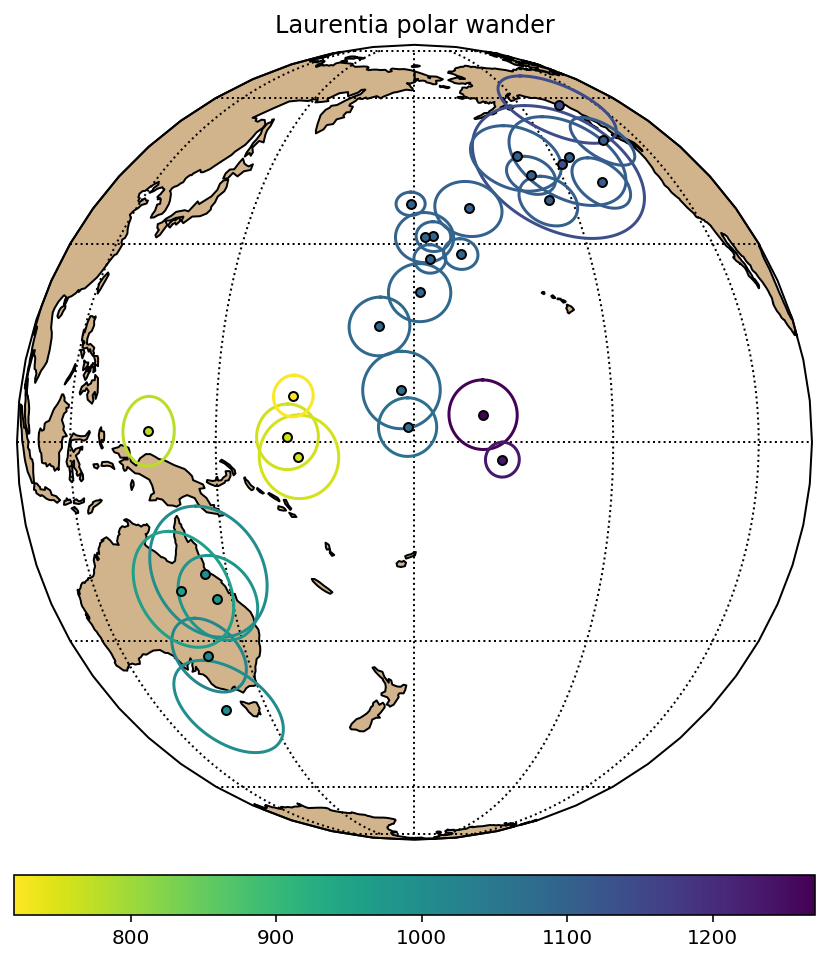

In [4]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=180, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander')
# plt.savefig('../figure/Logan_Kewee_Grenville_Loop.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x432 with 0 Axes>

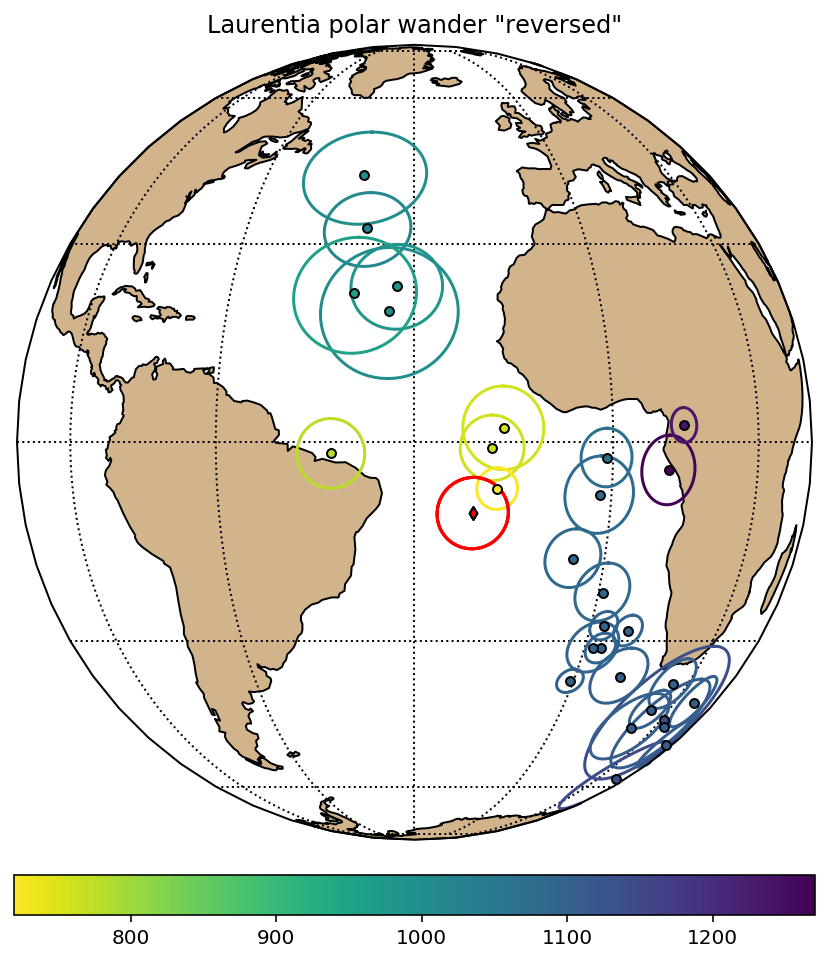

In [5]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=330, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n]-180,-poles.PLat[n],poles.A95[n],color=hex_color)
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')



scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander "reversed"')
# plt.savefig('../figure/Logan_Kewee_Grenville_Loop_rev.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x432 with 0 Axes>

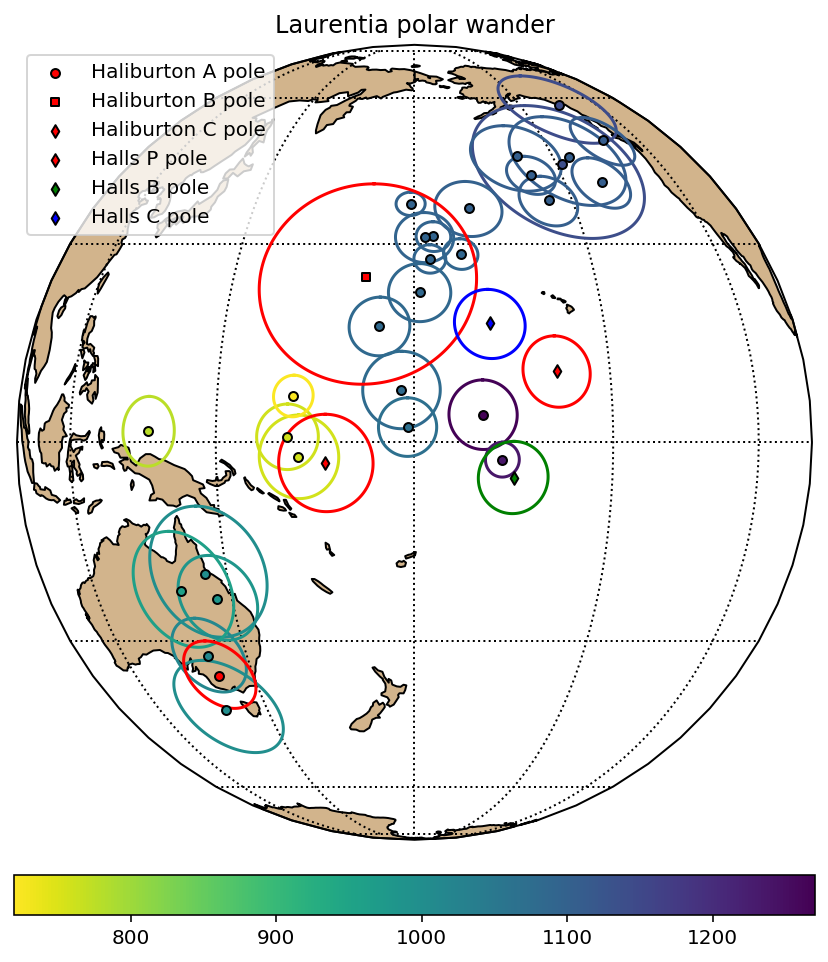

In [6]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=180, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
scalarMap.set_array(np.linspace(720,1110))    

ipmag.plot_pole(m, 142.5, -36, 6, marker = 'o', color = 'r', label = 'Haliburton A pole')
ipmag.plot_pole(m, 172.3, 24.5, 16, marker = 's', color = 'r', label = 'Haliburton B pole')
ipmag.plot_pole(m, 167, -3, 7, marker = 'd', color = 'r', label = 'Haliburton C pole')

ipmag.plot_pole(m, 180-338.6, 10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 180-345.5, -5.1, 5.2, marker = 'd', color = 'g', label = 'Halls B pole')
ipmag.plot_pole(m, 180-348.5, 17.4, 5.2, marker = 'd', color = 'b', label = 'Halls C pole')


plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander')
plt.legend()
# plt.savefig('../figure/Buchan1978_components.pdf', bbox_inches='tight')
plt.show()

## temp-time-relaxation from Pullaiah

Neel theory: the relaxation time of a given grain with volume v, microscopic coercive force hc, spontaneous magnetization js, put at temperature T, shall have a characteristic relaxation time of $\tau$ that follows: 

$$\tau = \frac{1}{C}exp(\frac{vh_{c}j_{s}}{2kT})$$

Therefore, given such a grain with known composition (e.g. magnetite or hematite), with known volume, assuming spherical shape, the follow relationship between characteristic relaxation time says:

$$\frac{T_1 ln[\tau _1C]}{j_s [T_1]h_c [T_1]} = \frac{T_2 ln[\tau _2C]}{j_s [T_2]h_c [T_2]}$$

Here both js (spontaneous magnetization) and hc (microscopic coercivity) are functions of temperature. 

For uniaxial anisotropy magnetite, $h_c \sim j_s$; for magnetocrystalline anisotropy hematite,  $h_c \sim j_s^3$. Therefore:
$$\frac{T_1 ln[\tau _1C]}{j_s[T_1] ^2} = \frac{T_2 ln[\tau _2C]}{j_s[T_2] ^2}    (magnetite)$$ 

$$\frac{T_1 ln[\tau _1C]}{j_s[T_1] ^4} = \frac{T_2 ln[\tau _2C]}{j_s[T_2] ^4}    (hematite)$$

And the temperature dependence of js for magnetite is described by: 
$$\frac{M_{s}[T]}{M_{s}[T_{0}]}=\left | \frac{T_{c}-T}{T_c-T_0} \right |^{\gamma }$$
Where $\gamma$ is derived from fitting experimental data - about 0.38. 



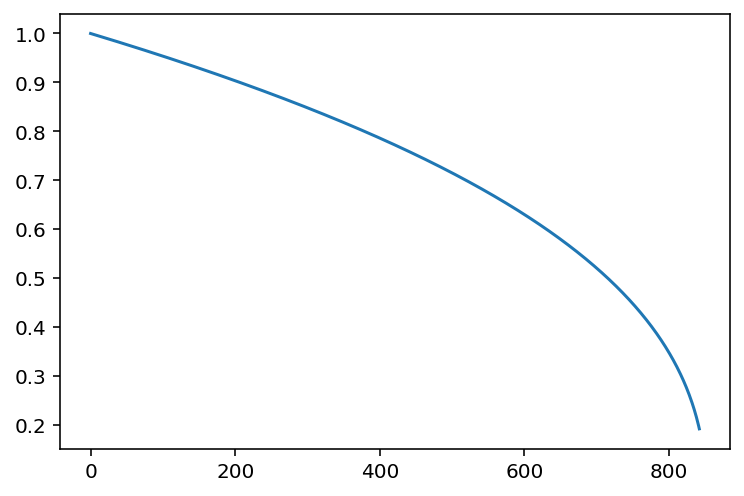

In [7]:
mag_js = 480000 #A/m for magnetite
T_js = []
for T in range(570+273):
    T_js.append(mag_js*np.abs((580+273.15-T)/(580+273.15))**0.38)
    
plt.plot(range(570+273), T_js/max(T_js))

Text(0.5, 1.0, 'magnetite nomogram')

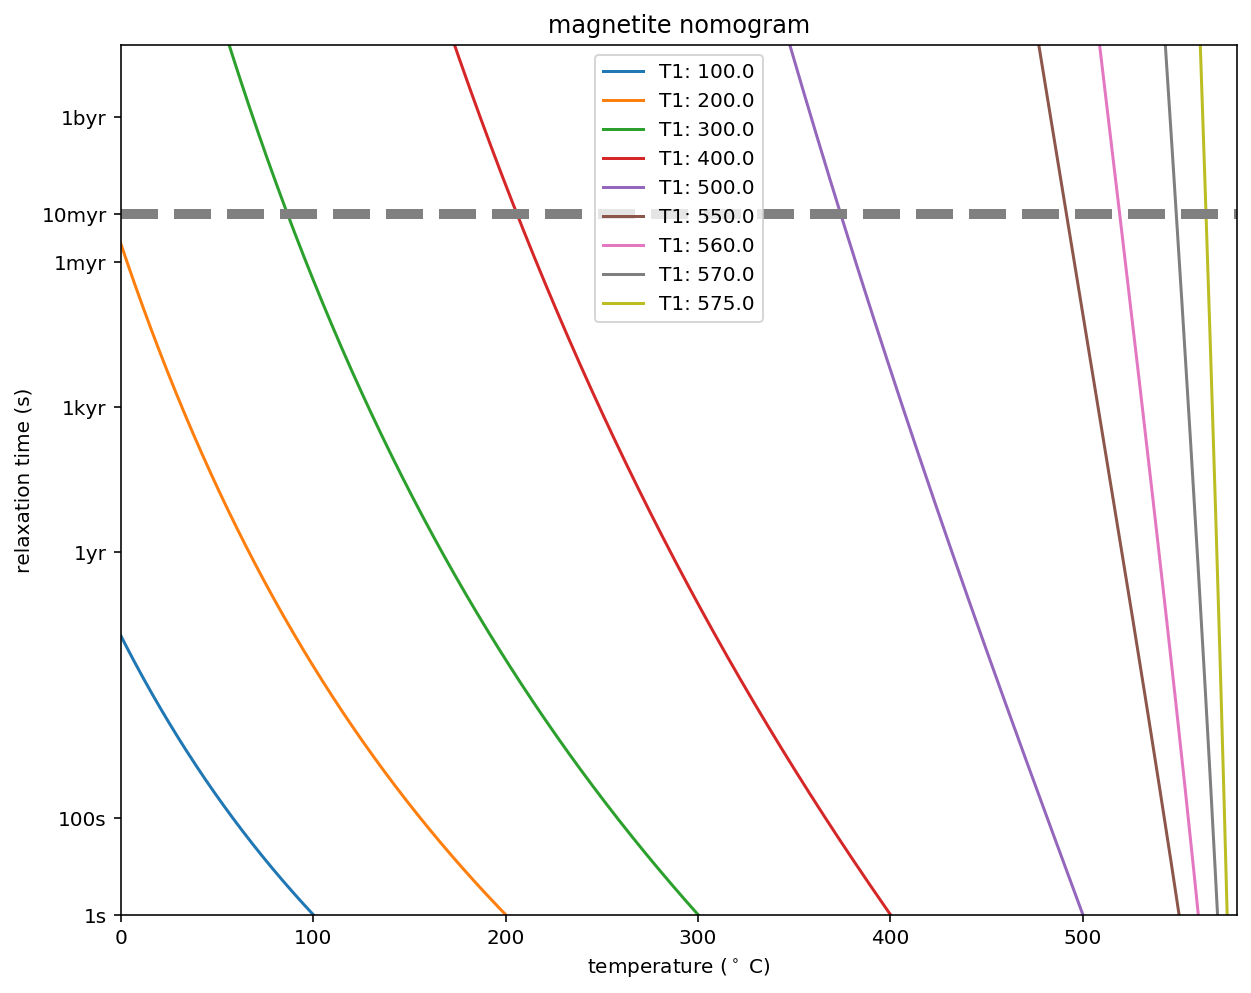

In [8]:
# initiallize a bunch of 1s relaxation time scenario for magnetite
fast_relax_temp = [i + 273.15 for i in[100, 200, 300, 400, 500, 550, 560, 570, 575]] # in celcius [100, 200, 300, 400, 500, 550] 
C = 1e10 # attempt frequency
tau1 = 1 # 1s
mag_js = 480000 #A/m for magnetite

plt.figure(figsize=(10,8))
for T1 in fast_relax_temp:
    T2_list = np.linspace(T1-300, T1, 1000)
    tau2_list = []
    T1_js = mag_js*np.abs((580+273.15-T1)/(580+273.15))**0.38
    for T2 in T2_list:
        T2_js = mag_js*np.abs((580+273.15-T2)/(580+273.15))**0.38

        tau2_list.append(np.exp(T1*np.log(tau1*C)*T2_js**2/T1_js**2/T2)/C)
    plt.plot(T2_list-273.15, tau2_list, label = 'T1: '+str(T1-273.15))
    
plt.plot([0,600], [1e7*Julian_year, 1e7*Julian_year], '--', color = 'grey', linewidth=5)
plt.xlabel('temperature ($^\circ$ C)')
plt.ylabel('relaxation time (s)')
plt.legend()
plt.xlim(0, 580)
plt.yscale('log')
plt.yticks(ticks=[1, 100, Julian_year, 1000*Julian_year, 1e6*Julian_year, 1e7*Julian_year, 1e9*Julian_year], 
           labels=['1s', '100s', '1yr', '1kyr', '1myr', '10myr', '1byr'])
plt.ylim(1, 1e18)
plt.title('magnetite nomogram')
# plt.savefig('../figure/magnetite_nomogram.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'hematite nomogram')

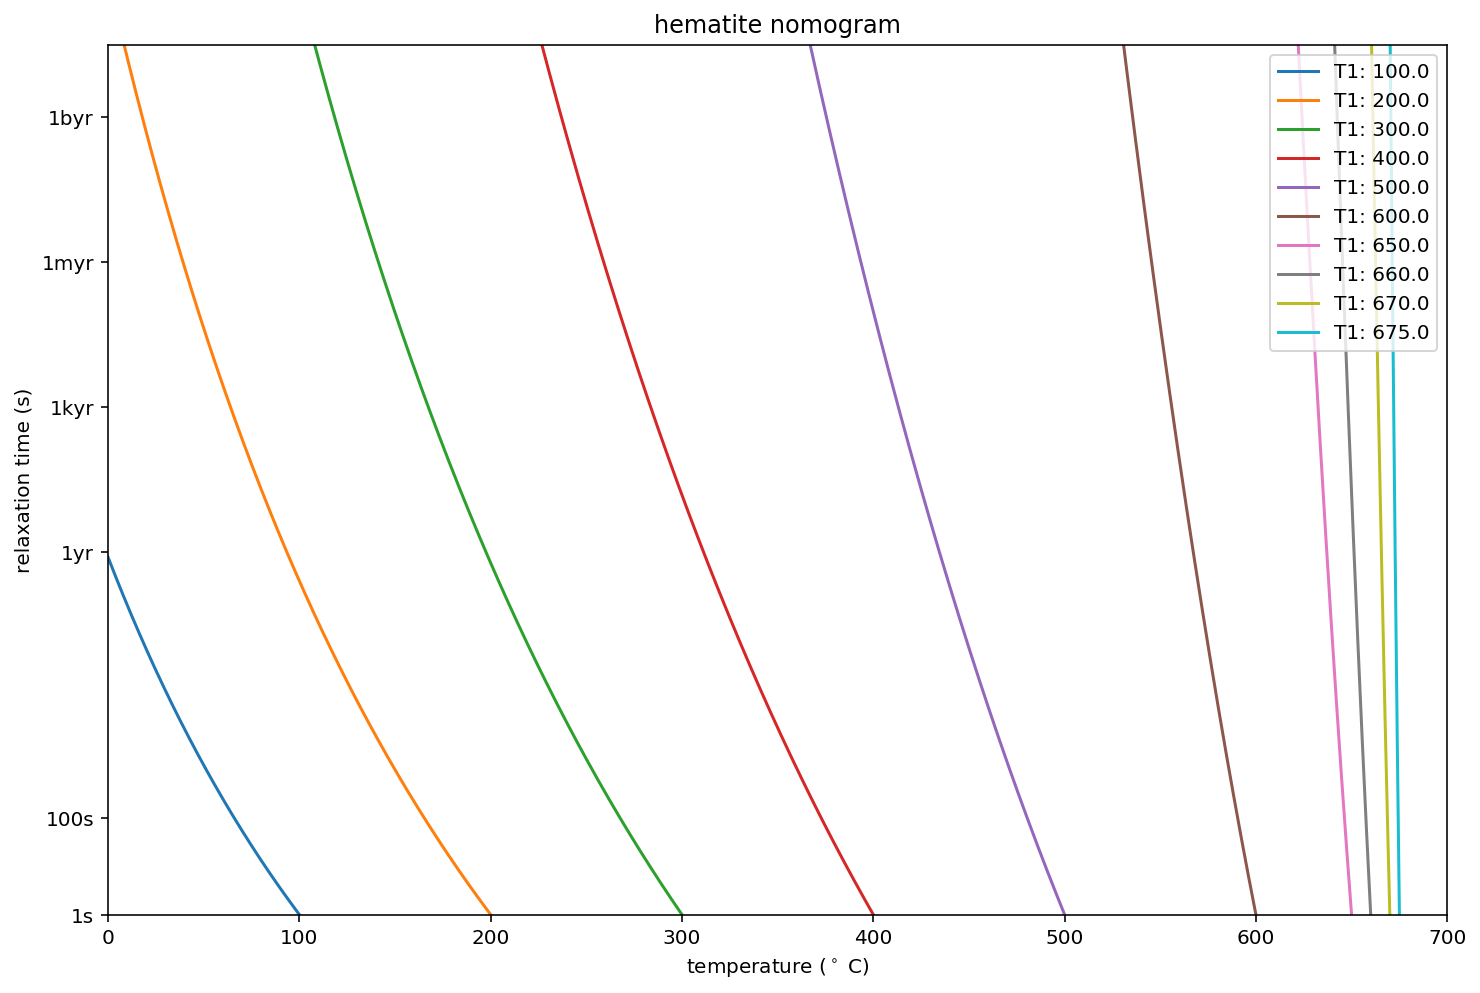

In [9]:
# initiallize a bunch of 1s relaxation time scenario for magnetite
fast_relax_temp = [i + 273.15 for i in[100, 200, 300, 400, 500, 600, 650, 660, 670, 675]] # in celcius [100, 200, 300, 400, 500, 550] 
C = 1e10 # attempt frequency
tau1 = 1 # 1s
hem_js = 2100 #A/m for magnetite

plt.figure(figsize=(12,8))
for T1 in fast_relax_temp:
    T2_list = np.linspace(T1-400, T1, 5000)
    tau2_list = []
    T1_js = hem_js*np.abs((680+273.15-T1)/(680+273.15))**0.38
    for T2 in T2_list:
        T2_js = hem_js*np.abs((680+273.15-T2)/(680+273.15))**0.38

        tau2_list.append(np.exp(T1*np.log(tau1*C)*T2_js**4/T1_js**4/T2)/C)
    plt.plot(T2_list-273.15, tau2_list, label = 'T1: '+str(T1-273.15))
    
plt.xlabel('temperature ($^\circ$ C)')
plt.ylabel('relaxation time (s)')
plt.xlim(0, 700)
plt.yscale('log')
plt.yticks(ticks=[1, 100, Julian_year, 1000*Julian_year, 1e6*Julian_year, 1e9*Julian_year], 
           labels=['1s', '100s', '1yr', '1kyr', '1myr', '1byr'])
plt.ylim(1, 1e18)
plt.legend()
plt.title('hematite nomogram')
# plt.savefig('../figure/hematite_nomogram.pdf')

## Brown 2012 Adirondack paper


In [81]:
Brown2012a_data = pd.read_csv('../data/Brown2012a.csv')
Brown2012a_data['VGP_lat'] = [ -Brown2012a_data['vgp_lat'][i] if Brown2012a_data['vgp_lon'][i] > 250 else Brown2012a_data['vgp_lat'][i] for i in range(len(Brown2012a_data['vgp_lon']))]
Brown2012a_data['VGP_lon'] = [ (Brown2012a_data['vgp_lon'][i]-180) if Brown2012a_data['vgp_lon'][i] > 250 else Brown2012a_data['vgp_lon'][i] for i in range(len(Brown2012a_data['vgp_lon']))]

Brown2012a_data.head()

,location,site,N,dir_inc,dir_dec,k,a95,vgp_lat,vgp_lon,VGP_lat,VGP_lon
0,microcline gneiss,AD1,6,-62.3,232.1,100,6.7,-53.1,175.8,-53.1,175.8
1,microcline gneiss,AD2,4,-62.9,257.8,97,9.4,-36.4,164.3,-36.4,164.3
2,microcline gneiss,AD5,10,-51.5,292.2,22,10.6,-8.0,157.4,-8.0,157.4
3,microcline gneiss,AD6,10,-67.8,271.2,260,3.0,-31.9,152.1,-31.9,152.1
4,microcline gneiss,AD11,7,44.8,98.1,120,5.5,12.6,349.3,-12.6,169.3


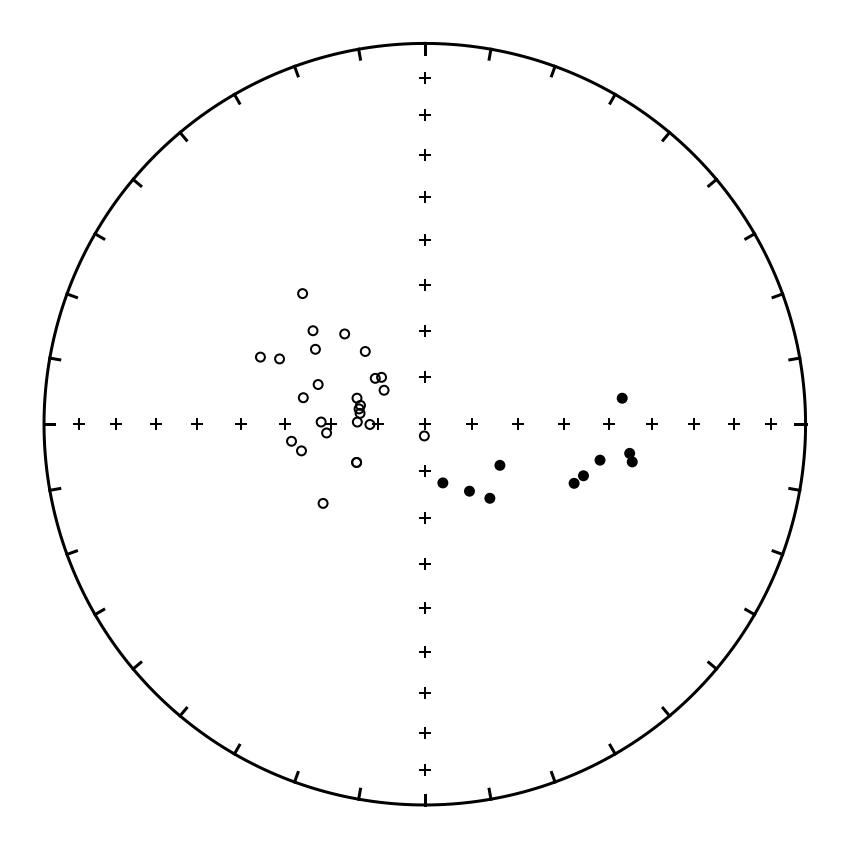

In [82]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Brown2012a_data['dir_dec'].tolist(), Brown2012a_data['dir_inc'].tolist())

<Figure size 432x432 with 0 Axes>

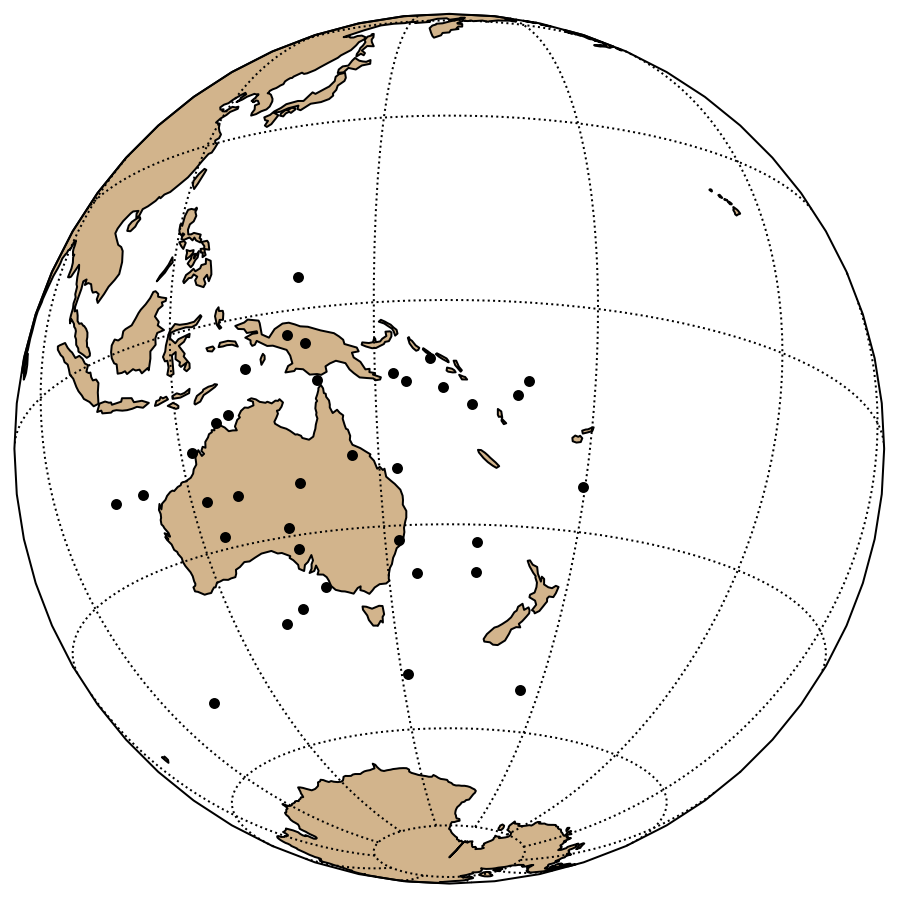

In [83]:
plt.figure(figsize=(6,6))
m = ipmag.make_orthographic_map(160, -20)
ipmag.plot_vgp(m, Brown2012a_data['VGP_lon'].tolist(), Brown2012a_data['VGP_lat'].tolist())

In [84]:

Brown2012a_GMS = Brown2012a_data[Brown2012a_data['location'] == 'microcline gneiss']
Brown2012a_MA = Brown2012a_data[Brown2012a_data['location'] == 'metamorphic anorthosites']
Brown2012a_AM = Brown2012a_data[Brown2012a_data['location'] == 'associated metamorphic rocks']
Brown2012a_PM = Brown2012a_data[Brown2012a_data['location'] == 'post-metamorphic fayalite granites']

### microcline gneiss

In [85]:
Brown2012a_GMS

,location,site,N,dir_inc,dir_dec,k,a95,vgp_lat,vgp_lon,VGP_lat,VGP_lon
0,microcline gneiss,AD1,6,-62.3,232.1,100,6.7,-53.1,175.8,-53.1,175.8
1,microcline gneiss,AD2,4,-62.9,257.8,97,9.4,-36.4,164.3,-36.4,164.3
2,microcline gneiss,AD5,10,-51.5,292.2,22,10.6,-8.0,157.4,-8.0,157.4
3,microcline gneiss,AD6,10,-67.8,271.2,260,3.0,-31.9,152.1,-31.9,152.1
4,microcline gneiss,AD11,7,44.8,98.1,120,5.5,12.6,349.3,-12.6,169.3
5,microcline gneiss,AD15,3,68.9,138.7,351,6.6,12.7,308.5,-12.7,128.5
6,microcline gneiss,AD18,5,55.3,111.6,165,6.0,11.0,334.2,-11.0,154.2
7,microcline gneiss,AD21,7,-64.1,318.4,655,2.4,-7.1,131.8,-7.1,131.8
8,microcline gneiss,AD22,5,-63.3,282.3,113,7.2,-22.4,152.6,-22.4,152.6
9,microcline gneiss,AD26,5,76.9,162.9,760,2.8,19.9,291.6,-19.9,111.6


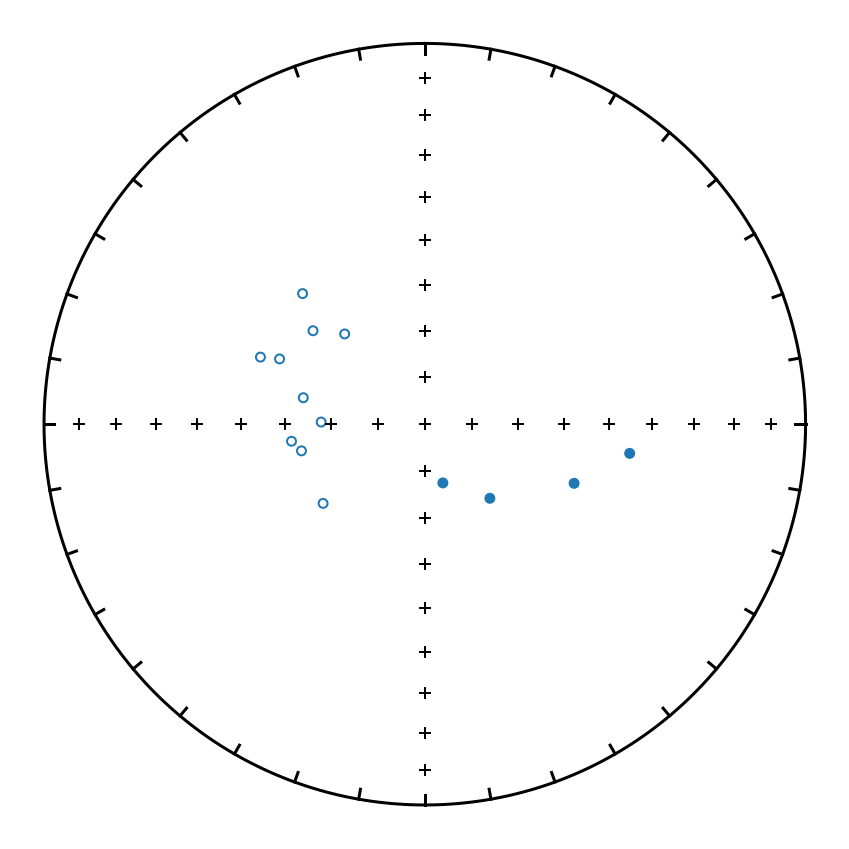

In [86]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Brown2012a_GMS['dir_dec'].tolist(), Brown2012a_GMS['dir_inc'].tolist(), color = 'C0')

<Figure size 432x432 with 0 Axes>

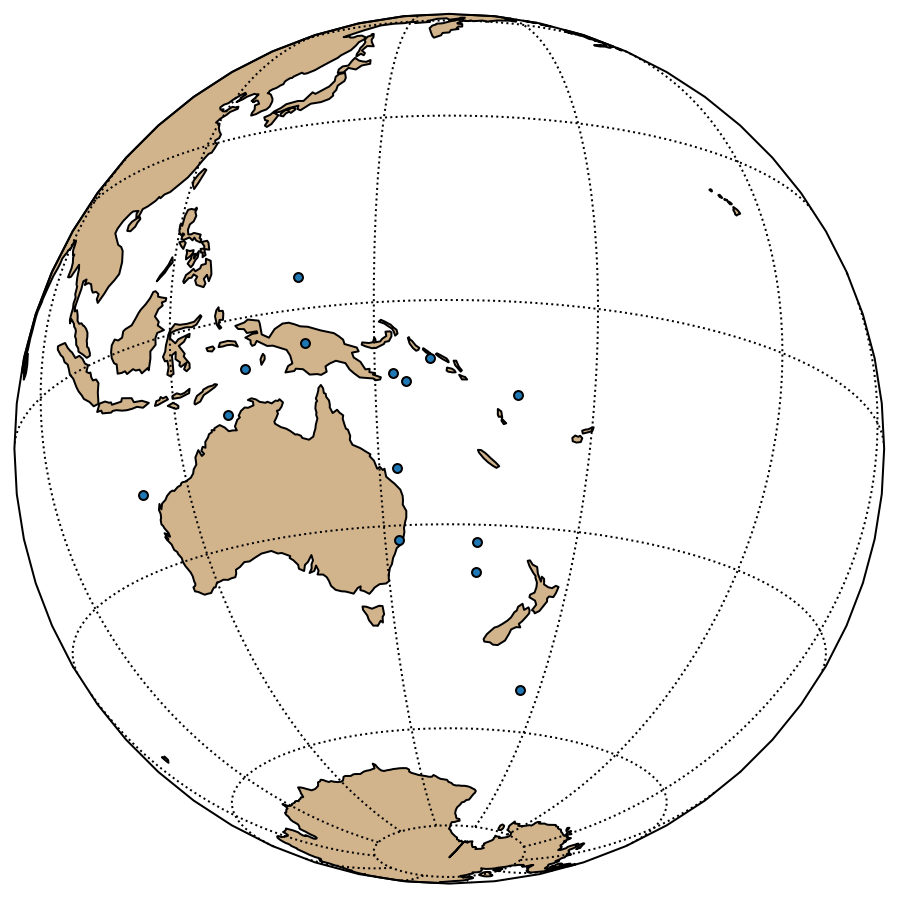

In [87]:
plt.figure(figsize=(6,6))
m = ipmag.make_orthographic_map(160, -20)
ipmag.plot_vgp(m, Brown2012a_GMS['VGP_lon'].tolist(), Brown2012a_GMS['VGP_lat'].tolist(), color = 'C0')

### metamorphic anorthosite

In [88]:
Brown2012a_MA

,location,site,N,dir_inc,dir_dec,k,a95,vgp_lat,vgp_lon,VGP_lat,VGP_lon
14,metamorphic anorthosites,AD12,5,-61.5,304.4,44,11.7,-10.0,142.0,-10.0,142.0
15,metamorphic anorthosites,AD28,5,51.2,101.6,67,9.4,14.1,343.1,-14.1,163.1
16,metamorphic anorthosites,AD32,3,-87.5,182.2,926,4.1,-49.1,104.3,-49.1,104.3
17,metamorphic anorthosites,AD33,5,-65.6,290.4,153,6.2,-20.3,146.2,-20.3,146.2
18,metamorphic anorthosites,ADH9,5,-75.6,312.8,210,4.3,-23.5,128.0,-23.5,128.0
19,metamorphic anorthosites,ADH10,4,-76.0,279.5,177,5.3,-19.5,105.6,-19.5,105.6
20,metamorphic anorthosites,ADH12,5,-73.3,240.7,798,2.2,-41.6,130.1,-41.6,130.1
21,metamorphic anorthosites,ADH32,6,43.9,100.3,107,5.5,10.7,350.7,-10.7,170.7
22,metamorphic anorthosites,ADH33,6,46.6,82.5,16,14.3,24.0,359.7,-24.0,179.7
23,metamorphic anorthosites,ADH34,6,-73.3,240.7,46,8.2,-51.0,151.4,-51.0,151.4


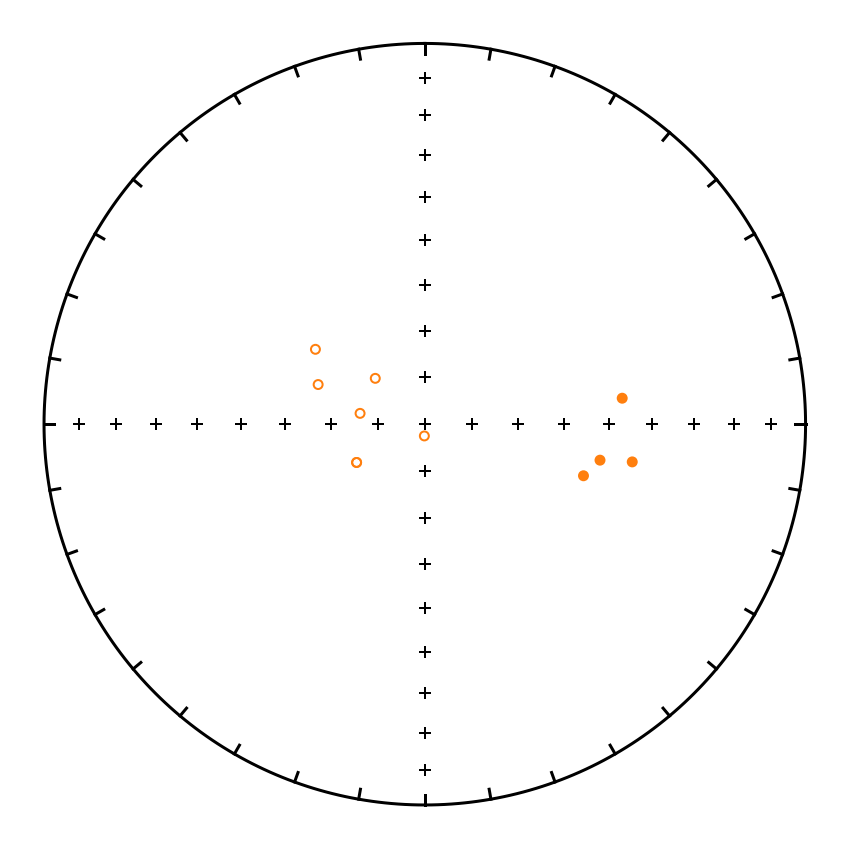

In [89]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Brown2012a_MA['dir_dec'].tolist(), Brown2012a_MA['dir_inc'].tolist(), color = 'C1')

<Figure size 432x432 with 0 Axes>

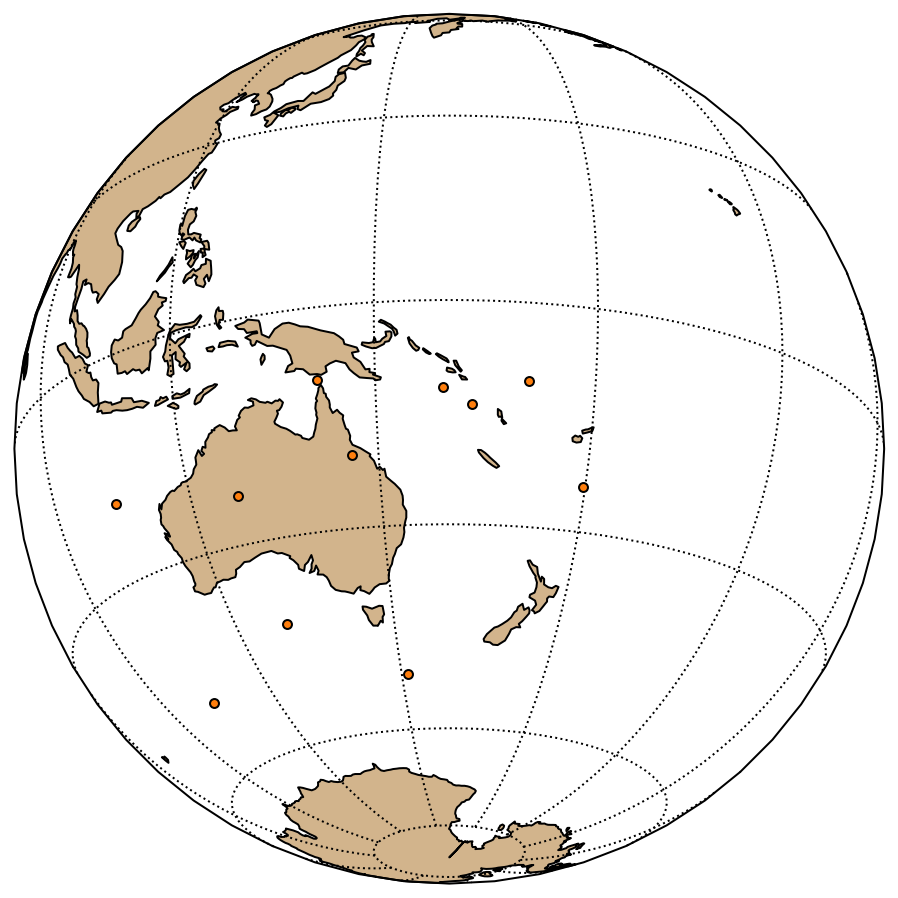

In [90]:
plt.figure(figsize=(6,6))
m = ipmag.make_orthographic_map(160, -20)
ipmag.plot_vgp(m, Brown2012a_MA['VGP_lon'].tolist(), Brown2012a_MA['VGP_lat'].tolist(), color = 'C1')

### associated rocks

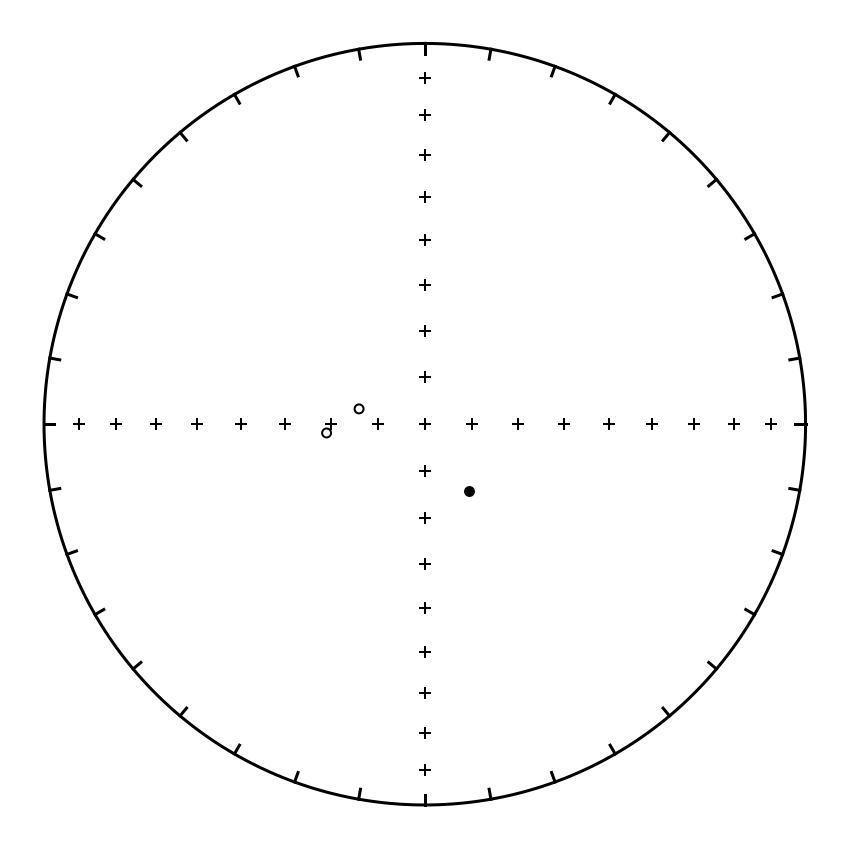

In [20]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Brown2012a_AM['dir_dec'].tolist(), Brown2012a_AM['dir_inc'].tolist())

### post-metamorphic fayalite granite

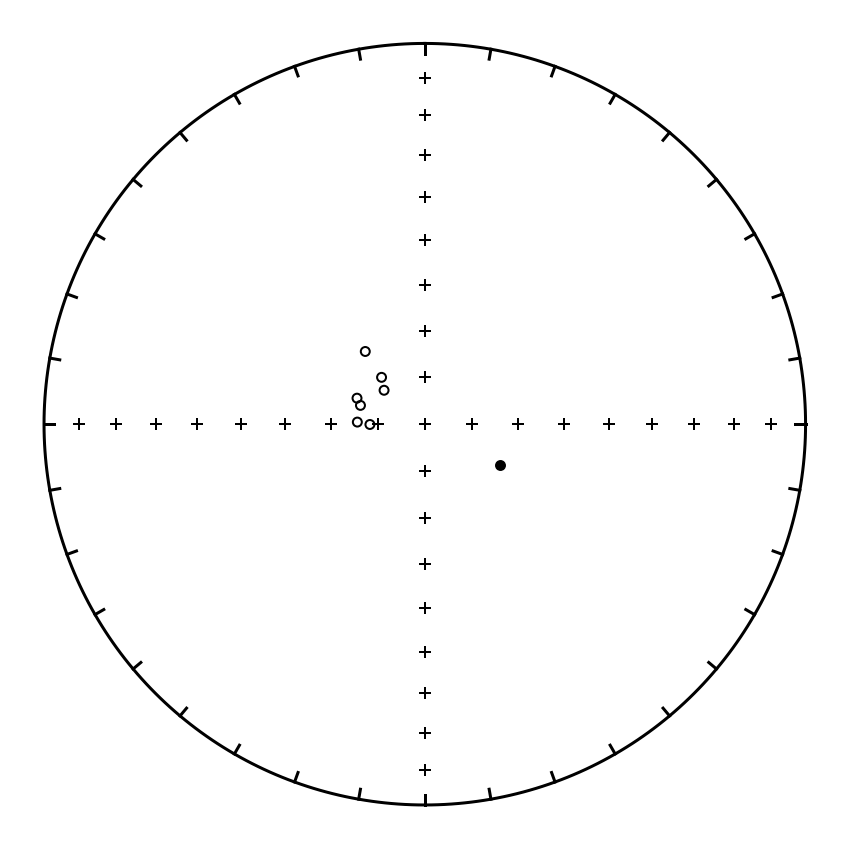

In [21]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Brown2012a_PM['dir_dec'].tolist(), Brown2012a_PM['dir_inc'].tolist())